### Cybersecurity Engineer Data

Research Question: “What is the distribution of salaries for Cybersecurity Engineers?”

This question can be answered by plotting a histogram (with a density estimate) of the “Salary” column.

This code starts by loading a dataset of Cybersecurity Engineers from an Excel file and tidies up the column names. It then focuses on the salary information—cleaning and converting it into a standard numeric format so that different ways of writing salaries (like "$50,000", "50k", or ranges like "50k-70k") are made comparable. Once the salaries are standardized, the code groups them into several ranges (for example, 0–50k, 50k–100k, etc.) and creates a visual chart that shows how many engineers fall into each salary range. In essence, it helps answer the question, "What is the overall salary distribution for Cybersecurity Engineers?" by clearly displaying the spread of salaries across defined ranges.

Rows before dropna: (900, 6)
Rows after dropna: (741, 6)
                             salary  salary_clean
1     $91K - $141KÂ (Employer est.)      116000.0
2    $95K - $132KÂ (Glassdoor est.)      113500.0
3     $98K - $195KÂ (Employer est.)      146500.0
4    $120K - $200KÂ (Employer est.)      160000.0
5    $130K - $160KÂ (Employer est.)      145000.0
7    $97K - $150KÂ (Glassdoor est.)      123500.0
11     $50K - $55KÂ (Employer est.)       52500.0
12    $89K - $151KÂ (Employer est.)      120000.0
13   $86K - $124KÂ (Glassdoor est.)      105000.0
14   $125K - $136KÂ (Employer est.)      130500.0
15    $98K - $125KÂ (Employer est.)      111500.0
16   $186K - $228KÂ (Employer est.)      207000.0
17   $101K - $127KÂ (Employer est.)      114000.0
19  $129K - $192KÂ (Glassdoor est.)      160500.0
20   $110K - $118KÂ (Employer est.)      114000.0
21    $93K - $191KÂ (Employer est.)      142000.0
22   $130K - $165KÂ (Employer est.)      147500.0
24   $85K - $121KÂ (Glassdoor est.)      10

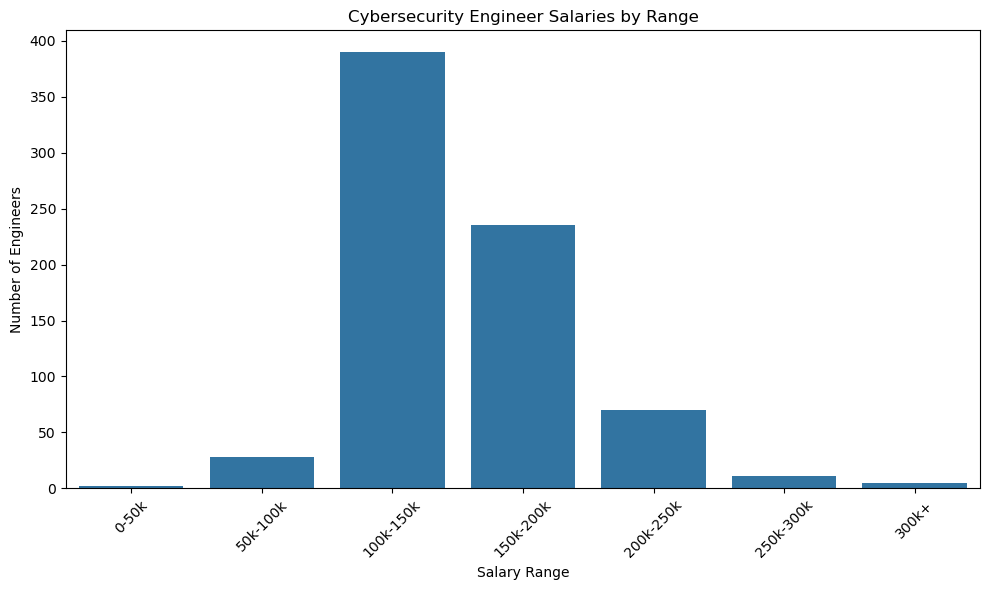

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# 1. Load the Cybersecurity Engineer dataset
df_cyber = pd.read_excel(
    "/Users/aakashsharma/Documents/George Mason University/Masters/DAEN 690 Capstone/Octoparse Data Sets/CybersecurityEngineer.xlsx"
)
df_cyber.columns = df_cyber.columns.str.strip()  # Remove extra spaces in column names

##############################################################################
# 2. Define a function to parse salary strings into numeric floats
##############################################################################
def parse_salary(s):
    """
    Handles formats like:
    - "$50,000"
    - "50k"
    - "$98K - $195K (Employer est.)"
    - "50000-70000"
    Returns a float (e.g., 50000.0) or None if parsing fails.
    """

    # If it's not a string, just return None
    if not isinstance(s, str):
        return None
    
    # 1) Remove text in parentheses, e.g. "(Employer est.)"
    #    This also removes any extra parentheses that might appear.
    s = re.sub(r"\(.*?\)", "", s)
    
    # 2) Remove the "Â" character or any non-ASCII characters
    s = s.encode("ascii", errors = "ignore").decode()  # strip out non-ASCII
    
    # 3) Lowercase and strip
    s = s.lower().strip()
    
    # 4) Remove currency symbols and commas
    #    We'll keep digits, dots, dashes, 'k'
    s = s.replace("$", "").replace(",", "").replace(" ", "")
    
    # If there's a dash, we might have a range like "50k-70k"
    if "-" in s:
        parts = s.split("-")
        vals = []
        for p in parts:
            # Remove trailing "k"
            has_k = "k" in p
            p = p.replace("k", "")
            # If empty after removing, skip
            if not p:
                return None
            try:
                val = float(p)
                # Multiply by 1,000 if we saw a 'k'
                if has_k:
                    val *= 1000
                vals.append(val)
            except:
                return None
        
        if len(vals) == 2:
            # Take the average of the two
            return (vals[0] + vals[1]) / 2
        elif len(vals) == 1:
            # Only one side was valid
            return vals[0]
        else:
            return None
    else:
        # Single value (e.g., "50k" or "120000")
        has_k = "k" in s
        p = s.replace("k", "")
        if not p:
            return None
        try:
            val = float(p)
            if has_k:
                val *= 1000
            return val
        except:
            return None

##############################################################################
# 3. Apply parsing function and clean up
##############################################################################
df_cyber["salary_clean"] = df_cyber["salary"].apply(parse_salary)

print("Rows before dropna:", df_cyber.shape)
df_cyber.dropna(subset = ["salary_clean"], inplace = True)
print("Rows after dropna:", df_cyber.shape)

# Optional: Inspect some parsed values
print(df_cyber[["salary", "salary_clean"]].head(20))

##############################################################################
# 4. Bin the numeric salaries
##############################################################################
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf]
labels = ["0-50k","50k-100k","100k-150k","150k-200k","200k-250k","250k-300k","300k+"]

df_cyber["Salary_Bin"] = pd.cut(df_cyber["salary_clean"], bins = bins, labels = labels)

##############################################################################
# 5. Plot a count of each salary range
##############################################################################
plt.figure(figsize = (10,6))
sns.countplot(x = "Salary_Bin", data = df_cyber)
plt.title("Cybersecurity Engineer Salaries by Range")
plt.xlabel("Salary Range")
plt.ylabel("Number of Engineers")
plt.xticks(rotation = 45)
plt.tight_layout()  # Make sure labels are fully visible
plt.show()

### Data Analyst Data

Research Question: "What is the overall salary distribution for Data Analysts in the dataset?"

This question aims to uncover the central tendency, spread, and range of salaries among data analysts by visualizing the data with a histogram and box plot.

This code begins by loading a dataset of Data Analysts from an Excel file and tidies up the column names to ensure everything is consistent. It then focuses on the salary information by using a custom function that cleans up and converts various salary formats—whether it's written as "$50,000", "50k", or even as a range—into a single numeric value. Any rows where the salary cannot be interpreted are removed to ensure the analysis is based on reliable data. Next, the code provides some debugging output to show a snapshot of the data and check where the salaries are coming from. Finally, it creates two visualizations—a histogram with a smooth density curve and a combined box plot with individual data points overlaid—to clearly show the overall distribution of Data Analyst salaries. Essentially, this code helps answer the question, "What is the overall salary distribution for Data Analysts?" by cleaning the data and displaying it in an easy-to-understand format.

Columns: ['Job Title', 'Remote', 'Location', 'State', 'Company', 'Salary', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']
      Job Title  Remote           Location State             Company  \
0  data analyst  Remote             Albany    NY          CVS Health   
1  data analyst  Remote          Arlington    WA          Arcadia.io   
2  data analyst  Remote             Aurora    CO  Ford Motor Company   
3  data analyst  Remote           Bethesda    MD         HelioCampus   
4  data analyst  Remote             Boston    MA   Intone Networ000s   
5  data analyst  Remote             Boston    MA           Cognizant   
6  data analyst  Remote         California   NaN      Serve Robotics   
7  data analyst  Remote         California   NaN      Corelation Inc   
8  data analyst  Remote         California   NaN    Dec000ers Brands   
9  data analyst  Remote  Dallas-Fort Worth   NaN        HomesUSA.com   

      Salary Unnamed: 6  Unname

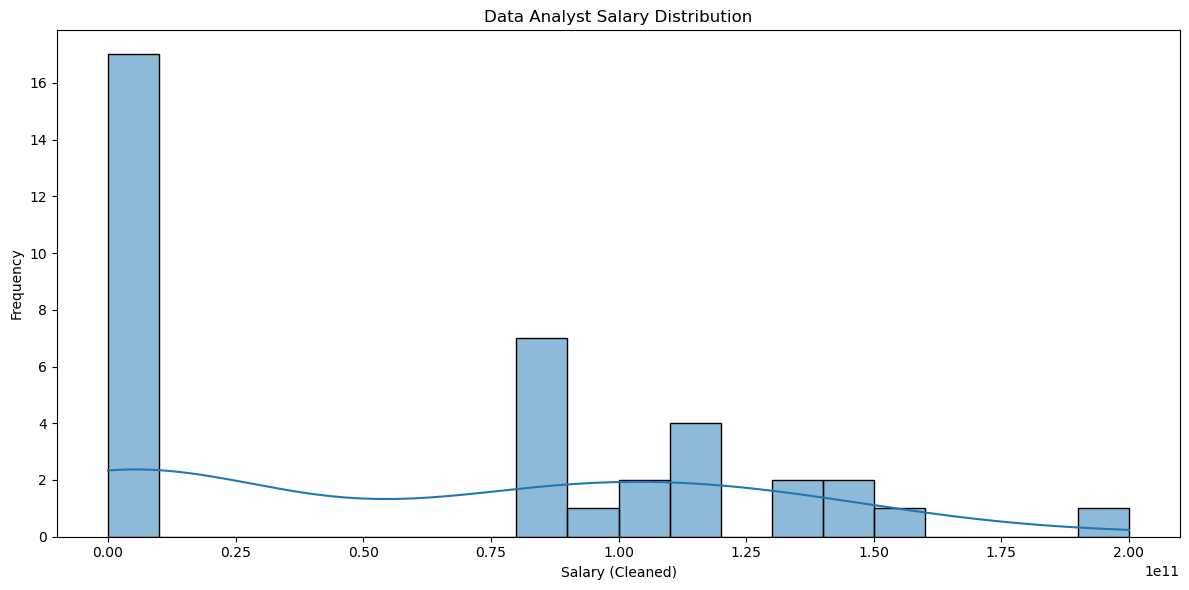

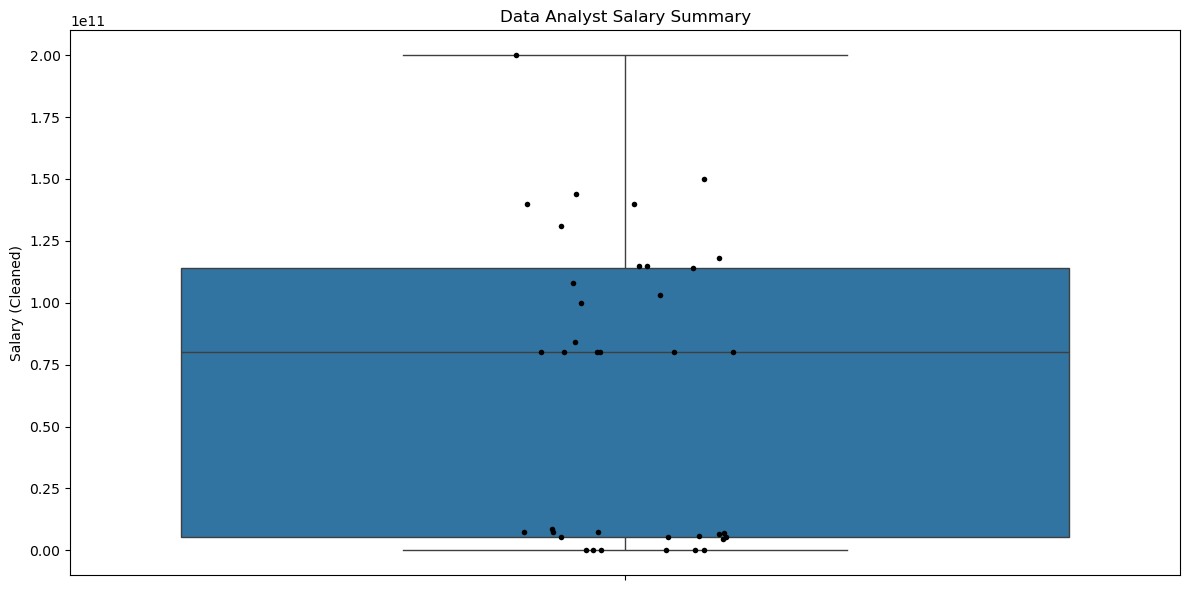

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

##############################################################################
# 1. Load the Data Analyst dataset
##############################################################################
df_analyst = pd.read_excel(
    "/Users/aakashsharma/Documents/George Mason University/Masters/DAEN 690 Capstone/Octoparse Data Sets/Data analyst Final.xlsx"
)

# Strip extra whitespace from column names
df_analyst.columns = df_analyst.columns.str.strip()
print("Columns:", df_analyst.columns.tolist())
print(df_analyst.head(10))

##############################################################################
# 2. Define a function to parse salary strings into numeric floats
##############################################################################
def parse_salary(s):
    """
    Handles formats such as:
      - "$50,000"
      - "50k"
      - "50k-70k"
      - "50000-70000"
      - Possibly includes extra text like "(Employer est.)" or stray characters.
    Returns a float (e.g., 50000.0) or None if parsing fails.
    """
    if not isinstance(s, str):
        return None
    
    # Remove any text in parentheses (e.g., "(Employer est.)")
    s = re.sub(r"\(.*?\)", "", s)
    
    # Remove non-ASCII characters (e.g., "Â")
    s = s.encode("ascii", errors="ignore").decode()
    
    # Lowercase and remove $, commas, and spaces
    s = s.lower().replace("$", "").replace(",", "").replace(" ", "").strip()
    
    # If there's a dash, handle as a range (e.g., "50k-70k")
    if "-" in s:
        parts = s.split("-")
        vals = []
        for p in parts:
            has_k = "k" in p
            p = p.replace("k", "")
            if not p:
                return None
            try:
                val = float(p)
                if has_k:
                    val *= 1000
                vals.append(val)
            except:
                return None
        # If exactly two parts, return the average; if one, just return it
        if len(vals) == 2:
            return sum(vals) / 2
        elif len(vals) == 1:
            return vals[0]
        else:
            return None
    else:
        # Single value, e.g., "50k" or "50000"
        has_k = "k" in s
        p = s.replace("k", "")
        if not p:
            return None
        try:
            val = float(p)
            if has_k:
                val *= 1000
            return val
        except:
            return None

##############################################################################
# 3. Apply the parser to the 'Salary' column and drop unparseable rows
##############################################################################
if "Salary" not in df_analyst.columns:
    print("No 'Salary' column found. Please confirm the correct column name.")
else:
    df_analyst["salary_clean"] = df_analyst["Salary"].apply(parse_salary)
    print("Rows before dropna:", df_analyst.shape)
    df_analyst.dropna(subset = ["salary_clean"], inplace = True)
    print("Rows after dropna:", df_analyst.shape)
    print(df_analyst[["Salary", "salary_clean"]].head(10))

##############################################################################
# 4. DEBUGGING CODE BLOCK: Check DataFrame shape, sample data, and unique locations
##############################################################################
print("\n--- DEBUGGING INFORMATION ---")
print("Data shape:", df_analyst.shape)
print("Sample data:\n", df_analyst.head(10))
if "Location" in df_analyst.columns:
    unique_locations = df_analyst["Location"].unique()
    print("Unique Locations:", unique_locations)
    location_counts = df_analyst["Location"].value_counts(dropna=False)
    print("Rows per Location:\n", location_counts)
else:
    print("No 'Location' column found in the DataFrame.")
print("--- END DEBUGGING INFORMATION ---\n")

##############################################################################
# 5. Plot the overall salary distribution: Histogram with KDE and Box Plot
##############################################################################
plt.figure(figsize = (12,6))
sns.histplot(df_analyst["salary_clean"], kde = True, bins = 20)
plt.title("Data Analyst Salary Distribution")
plt.xlabel("Salary (Cleaned)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot(y = "salary_clean", data = df_analyst)
sns.stripplot(y = "salary_clean", data = df_analyst, color = "black", size = 4, jitter = True)
plt.title("Data Analyst Salary Summary")
plt.ylabel("Salary (Cleaned)")
plt.tight_layout()
plt.show()

### Software Developer In-Office Data vs Software Developer Remote Data

Research Question: "How do salary distributions differ between in‑office and remote software developer roles?"

This code compares the salaries of software developers who work in-office versus those who work remotely. It starts by loading two separate datasets—one for in-office roles and one for remote roles—and cleans up the column names to ensure consistency. Then, a special function is used to transform various salary formats into a standard numeric value. Each dataset is labeled with its respective work mode and combined into one unified dataset. After removing any rows with problematic salary data and filtering out any extreme values, the code creates two visualizations. One is a box plot (with individual data points overlaid) that shows the spread of salaries for each work mode, and the other is a histogram with a smooth density curve that compares the overall salary distributions. Essentially, the code answers the research question, "How do salary distributions differ between in-office and remote software developers?" by clearly displaying the differences in their salary patterns.

Combined data shape: (602, 10)


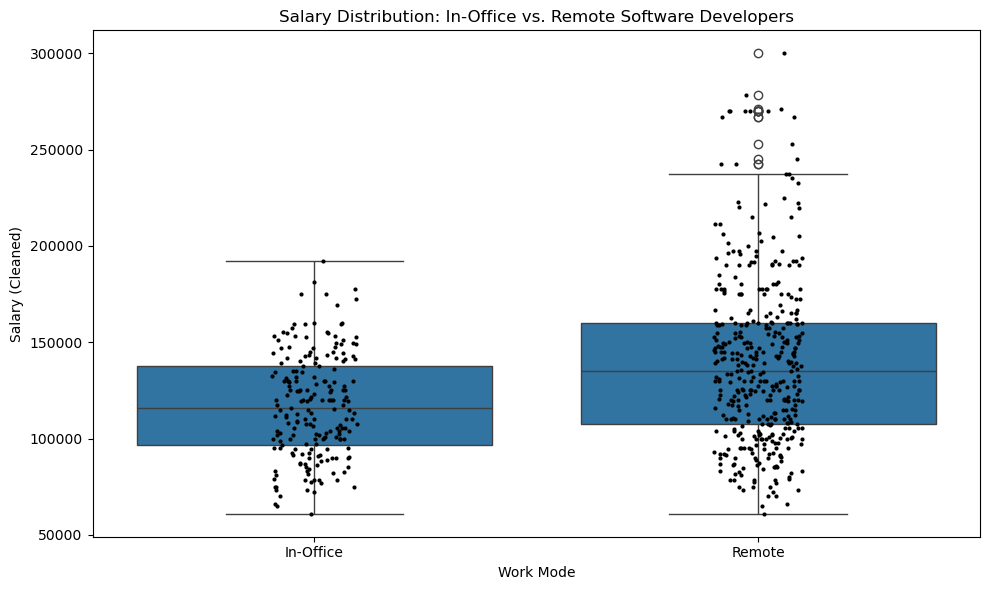

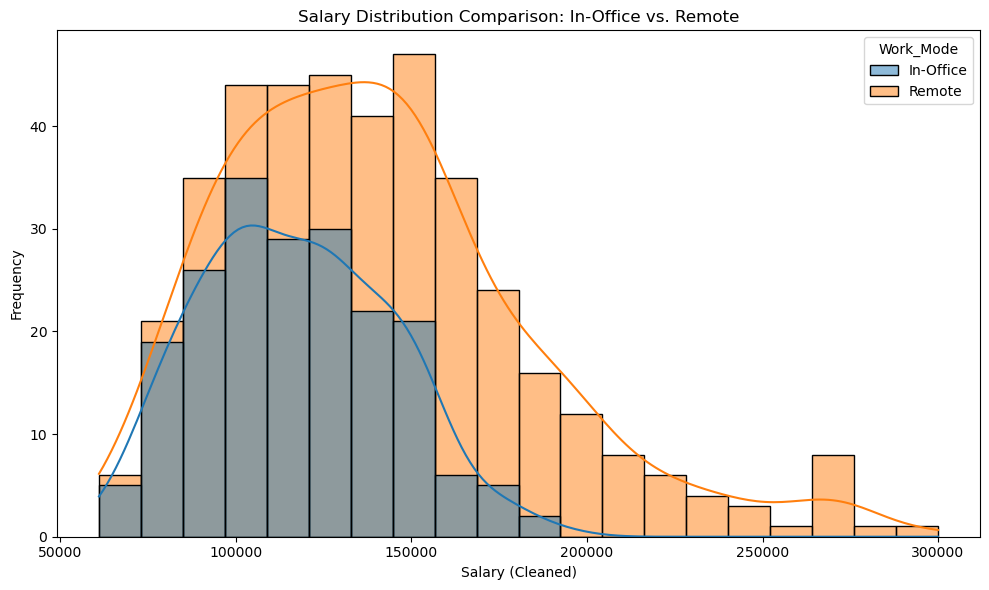

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

##############################################################################
# 1. Define a function to parse salary strings into numeric floats
##############################################################################
def parse_salary(s):
    """
    Parses salary strings such as:
      - "$50,000"
      - "50k"
      - "50k-70k"
      - "50000-70000"
    It also strips out extra text (e.g., "(Employer est.)") and non-ASCII characters.
    Returns a float (e.g., 50000.0) or None if parsing fails.
    """
    if not isinstance(s, str):
        return None
    
    # Remove any text in parentheses, e.g., "(Employer est.)"
    s = re.sub(r"\(.*?\)", "", s)
    
    # Remove non-ASCII characters (e.g., "Â")
    s = s.encode("ascii", errors="ignore").decode()
    
    # Lowercase and remove $, commas, and spaces
    s = s.lower().replace("$", "").replace(",", "").replace(" ", "").strip()
    
    # If a dash is present, treat as a range (e.g., "50k-70k")
    if "-" in s:
        parts = s.split("-")
        vals = []
        for p in parts:
            has_k = "k" in p
            p = p.replace("k", "")
            if not p:
                return None
            try:
                val = float(p)
                if has_k:
                    val *= 1000
                vals.append(val)
            except:
                return None
        if len(vals) == 2:
            return sum(vals) / 2  # Return average of the range
        elif len(vals) == 1:
            return vals[0]
        else:
            return None
    else:
        # Single value, e.g., "50k" or "50000"
        has_k = "k" in s
        p = s.replace("k", "")
        if not p:
            return None
        try:
            val = float(p)
            if has_k:
                val *= 1000
            return val
        except:
            return None

##############################################################################
# 2. Load and process the in-office dataset
##############################################################################
df_in_office = pd.read_excel('/Users/aakashsharma/Documents/George Mason University/Masters/DAEN 690 Capstone/Octoparse Data Sets/software developer in office data.xlsx')
df_in_office.columns = df_in_office.columns.str.strip()  # Clean column names

# Parse the Salary column (assumed to be named "Salary")
df_in_office["salary_clean"] = df_in_office["salary"].apply(parse_salary)
df_in_office["Work_Mode"] = "In-Office"  # Label this dataset

##############################################################################
# 3. Load and process the remote dataset
##############################################################################
df_remote = pd.read_excel('/Users/aakashsharma/Documents/George Mason University/Masters/DAEN 690 Capstone/Octoparse Data Sets/software developer remote data.xlsx')
df_remote.columns = df_remote.columns.str.strip()  # Clean column names

# Parse the Salary column (assumed to be named "Salary")
df_remote["salary_clean"] = df_remote["salary"].apply(parse_salary)
df_remote["Work_Mode"] = "Remote"  # Label this dataset

##############################################################################
# 4. Combine the two datasets and clean up
##############################################################################
df_combined = pd.concat([df_in_office, df_remote], ignore_index = True)
df_combined.dropna(subset = ["salary_clean"], inplace = True)

# Optional: Filter out extreme values (adjust thresholds as needed)
df_combined = df_combined[(df_combined["salary_clean"] >= 30000) & (df_combined["salary_clean"] <= 300000)]
print("Combined data shape:", df_combined.shape)

##############################################################################
# 5. Compare salary distributions between In-Office and Remote roles
##############################################################################

# Box plot with overlaid strip plot for individual data points
plt.figure(figsize = (10,6))
sns.boxplot(x = "Work_Mode", y = "salary_clean", data = df_combined, showfliers = True)
sns.stripplot(x = "Work_Mode", y = "salary_clean", data = df_combined, color="black", size = 3, jitter = True)
plt.title("Salary Distribution: In-Office vs. Remote Software Developers")
plt.xlabel("Work Mode")
plt.ylabel("Salary (Cleaned)")
plt.tight_layout()
plt.show()

# Histogram with KDE overlay for a density comparison
plt.figure(figsize=(10,6))
sns.histplot(data = df_combined, x = "salary_clean", hue = "Work_Mode", bins = 20, kde = True)
plt.title("Salary Distribution Comparison: In-Office vs. Remote")
plt.xlabel("Salary (Cleaned)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()